# Telekom Churn Prediction

In this project, we will predict whether a customer will leave or not based on many factors

# 
 0   SeniorCitizen
 
 1   Tenure           
 2   MultipleLines   
 3   InternetService   
 4   OnlineBackup      
 5   StreamingTV       
 6   StreamingMovies  
 7   Contract         
 8   PaperlessBilling 
 9   PaymentMethod     
 10  Churn         

In [231]:
import pandas as pd
import numpy as np


In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [233]:
df = pd.read_csv('Telecom.csv')

In [234]:
df.head()

,Unnamed: 0,Gender,SeniorCitizen,Tenure,MultipleLines,InternetService,OnlineBackup,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,2533,Female,Yes,True,No,Fiber optic,No,Yes,Yes,One year,Yes,Bank transfer (automatic),No
1,3113,Male,No,True,Yes,Fiber optic,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),No
2,6482,Female,No,False,No,Fiber optic,No,No,No,Month-to-month,No,Credit card (automatic),No
3,5508,Female,No,True,No,DSL,Yes,No,No,One year,Yes,Electronic check,No
4,2544,Male,No,True,Yes,Fiber optic,No,Yes,Yes,Month-to-month,No,Mailed check,Yes


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Gender            1000 non-null   object
 2   SeniorCitizen     1000 non-null   object
 3   Tenure            1000 non-null   bool  
 4   MultipleLines     1000 non-null   object
 5   InternetService   1000 non-null   object
 6   OnlineBackup      1000 non-null   object
 7   StreamingTV       1000 non-null   object
 8   StreamingMovies   1000 non-null   object
 9   Contract          1000 non-null   object
 10  PaperlessBilling  1000 non-null   object
 11  PaymentMethod     1000 non-null   object
 12  Churn             1000 non-null   object
dtypes: bool(1), int64(1), object(11)
memory usage: 94.9+ KB


In [236]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [237]:
df.describe()

,Gender,SeniorCitizen,Tenure,MultipleLines,InternetService,OnlineBackup,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,3,2,2,2,3,2,4,2
top,Male,No,True,No,Fiber optic,No,No,No,Month-to-month,Yes,Electronic check,No
freq,521,828,697,572,437,632,592,607,558,598,329,741


In [238]:
df.isnull().mean()

Gender              0.0
SeniorCitizen       0.0
Tenure              0.0
MultipleLines       0.0
InternetService     0.0
OnlineBackup        0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
Churn               0.0
dtype: float64

In [239]:
for col in df.columns[1:]:
    print(col, ':',df[col].unique(),'labels')
    


SeniorCitizen : ['Yes' 'No'] labels
Tenure : [ True False] labels
MultipleLines : ['No' 'Yes'] labels
InternetService : ['Fiber optic' 'DSL' 'No'] labels
OnlineBackup : ['No' 'Yes'] labels
StreamingTV : ['Yes' 'No'] labels
StreamingMovies : ['Yes' 'No'] labels
Contract : ['One year' 'Two year' 'Month-to-month'] labels
PaperlessBilling : ['Yes' 'No'] labels
PaymentMethod : ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check'] labels
Churn : ['No' 'Yes'] labels


In [240]:
for col in df.columns[1:]:
    print(col, ':',df[col].nunique(),'labels')


SeniorCitizen : 2 labels
Tenure : 2 labels
MultipleLines : 2 labels
InternetService : 3 labels
OnlineBackup : 2 labels
StreamingTV : 2 labels
StreamingMovies : 2 labels
Contract : 3 labels
PaperlessBilling : 2 labels
PaymentMethod : 4 labels
Churn : 2 labels


In [241]:
for col in df.columns[0:]:
    print(col, ':', df[col].value_counts().to_dict())

Gender : {'Male': 521, 'Female': 479}
SeniorCitizen : {'No': 828, 'Yes': 172}
Tenure : {True: 697, False: 303}
MultipleLines : {'No': 572, 'Yes': 428}
InternetService : {'Fiber optic': 437, 'DSL': 367, 'No': 196}
OnlineBackup : {'No': 632, 'Yes': 368}
StreamingTV : {'No': 592, 'Yes': 408}
StreamingMovies : {'No': 607, 'Yes': 393}
Contract : {'Month-to-month': 558, 'Two year': 230, 'One year': 212}
PaperlessBilling : {'Yes': 598, 'No': 402}
PaymentMethod : {'Electronic check': 329, 'Bank transfer (automatic)': 246, 'Mailed check': 225, 'Credit card (automatic)': 200}
Churn : {'No': 741, 'Yes': 259}


In [242]:
#df['Churn'] = pd.get_dummies(df['Churn'])

In [243]:
df.head(5)

,Gender,SeniorCitizen,Tenure,MultipleLines,InternetService,OnlineBackup,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,True,No,Fiber optic,No,Yes,Yes,One year,Yes,Bank transfer (automatic),No
1,Male,No,True,Yes,Fiber optic,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),No
2,Female,No,False,No,Fiber optic,No,No,No,Month-to-month,No,Credit card (automatic),No
3,Female,No,True,No,DSL,Yes,No,No,One year,Yes,Electronic check,No
4,Male,No,True,Yes,Fiber optic,No,Yes,Yes,Month-to-month,No,Mailed check,Yes


In [244]:
replacing_val = {
'Gender' : {'Male': 1, 'Female': 0},
'SeniorCitizen' : {'No': 0, 'Yes': 1},
'MultipleLines' : {'No': 0, 'Yes': 1},
'InternetService' : {'Fiber optic': 1, 'DSL': 2, 'No': 3},
'OnlineBackup' : {'No': 0, 'Yes': 1},
'StreamingTV' : {'No': 0, 'Yes': 1},
'StreamingMovies' : {'No': 0, 'Yes': 1},
'Contract' : {'Month-to-month': 1, 'Two year': 2, 'One year': 3},
'PaperlessBilling' : {'Yes': 1, 'No': 0},
'PaymentMethod' : {'Electronic check': 1, 'Bank transfer (automatic)': 2, 'Mailed check': 3, 'Credit card (automatic)': 4},
'Churn' : {'No': 0, 'Yes': 1}
    
}

In [245]:
df.replace(replacing_val,inplace=True)

In [246]:
df['Tenure'] = pd.get_dummies(df['Tenure'])

In [247]:
df.head()

,Gender,SeniorCitizen,Tenure,MultipleLines,InternetService,OnlineBackup,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,1,1,3,1,2,0
1,1,0,0,1,1,1,0,1,2,1,2,0
2,0,0,1,0,1,0,0,0,1,0,4,0
3,0,0,0,0,2,1,0,0,3,1,1,0
4,1,0,0,1,1,0,1,1,1,0,3,1


In [248]:
## Importing stats models for running logistic regression
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [249]:
## Defining the model and assigning Y (Dependent) and Age (Independent Variables)
model_lin = sm.GLM.from_formula("Churn ~ Gender+SeniorCitizen+Tenure+MultipleLines+InternetService+OnlineBackup+StreamingTV+StreamingMovies+Contract+PaperlessBilling+PaymentMethod",family=sm.families.Binomial(), data=df)
## Fitting the model and publishing the results
result_lin = model_lin.fit()
print(result_lin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -439.87
Date:                Fri, 17 Jul 2020   Deviance:                       879.74
Time:                        14:15:14   Pearson chi2:                 1.05e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4456      0.437  

In [250]:
## Defining the model and assigning Y (Dependent) and Age (Independent Variables)
model_lin = sm.GLM.from_formula("Churn ~ SeniorCitizen+Tenure+InternetService+OnlineBackup+Contract+PaperlessBilling+PaymentMethod",family=sm.families.Binomial(), data=df)
## Fitting the model and publishing the results
result_lin = model_lin.fit()
print(result_lin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -440.57
Date:                Fri, 17 Jul 2020   Deviance:                       881.13
Time:                        14:15:15   Pearson chi2:                 1.07e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2548      0.378  

In [251]:
df.head()

,Gender,SeniorCitizen,Tenure,MultipleLines,InternetService,OnlineBackup,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,1,1,3,1,2,0
1,1,0,0,1,1,1,0,1,2,1,2,0
2,0,0,1,0,1,0,0,0,1,0,4,0
3,0,0,0,0,2,1,0,0,3,1,1,0
4,1,0,0,1,1,0,1,1,1,0,3,1


In [252]:
df.shape

(1000, 12)

In [253]:
df.drop(labels=['Gender','MultipleLines','StreamingTV','StreamingMovies',],axis=1,inplace=True)

In [254]:
df

,SeniorCitizen,Tenure,InternetService,OnlineBackup,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,0,1,0,3,1,2,0
1,0,0,1,1,2,1,2,0
2,0,1,1,0,1,0,4,0
3,0,0,2,1,3,1,1,0
4,0,0,1,0,1,0,3,1
...,...,...,...,...,...,...,...,...
995,0,1,2,0,1,1,3,1
996,0,0,3,0,3,1,4,0
997,1,0,1,1,3,0,2,0
998,0,0,1,1,3,1,4,0


In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,1000.0,0.172,0.377569,0.0,0.0,0.0,0.0,1.0
Tenure,1000.0,0.303,0.459785,0.0,0.0,0.0,1.0,1.0
InternetService,1000.0,1.759,0.758614,1.0,1.0,2.0,2.0,3.0
OnlineBackup,1000.0,0.368,0.482503,0.0,0.0,0.0,1.0,1.0
Contract,1000.0,1.654,0.806805,1.0,1.0,1.0,2.0,3.0
PaperlessBilling,1000.0,0.598,0.490547,0.0,0.0,1.0,1.0,1.0
PaymentMethod,1000.0,2.296,1.125900,1.0,1.0,2.0,3.0,4.0
Churn,1000.0,0.259,0.438305,0.0,0.0,0.0,1.0,1.0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SeniorCitizen     1000 non-null   int64
 1   Tenure            1000 non-null   uint8
 2   InternetService   1000 non-null   int64
 3   OnlineBackup      1000 non-null   int64
 4   Contract          1000 non-null   int64
 5   PaperlessBilling  1000 non-null   int64
 6   PaymentMethod     1000 non-null   int64
 7   Churn             1000 non-null   int64
dtypes: int64(7), uint8(1)
memory usage: 55.8 KB


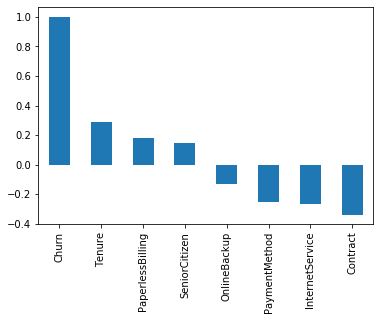

In [257]:
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [258]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [259]:
df1['Churn'].value_counts()

0    741
1    259
Name: Churn, dtype: int64

In [260]:
#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['will not change(stay as customer)','leave'], values = df1['Churn'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [261]:
target_percent()

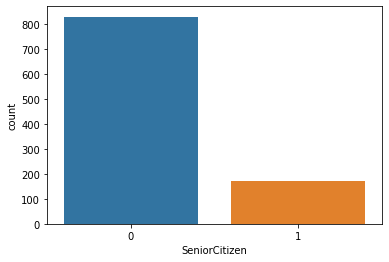

In [262]:
sns.countplot(df1['SeniorCitizen'])

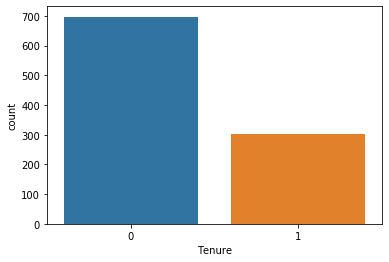

In [263]:
sns.countplot(df1['Tenure'])

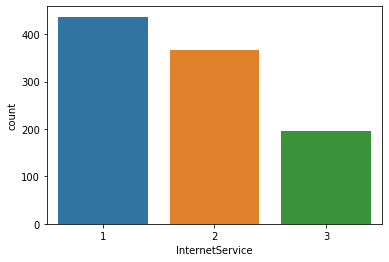

In [264]:
sns.countplot(df1['InternetService'])

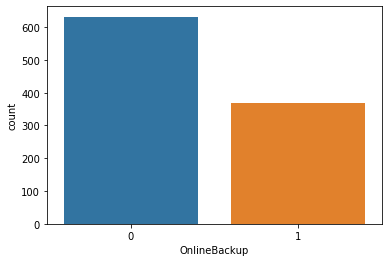

In [265]:
sns.countplot(df1['OnlineBackup'])


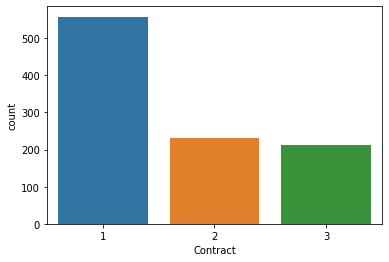

In [266]:
sns.countplot(df['Contract'])

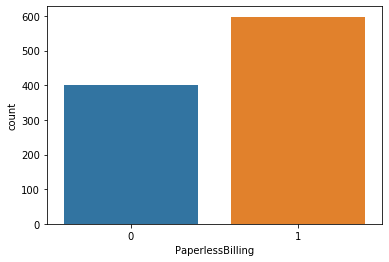

In [267]:
sns.countplot(df['PaperlessBilling'])

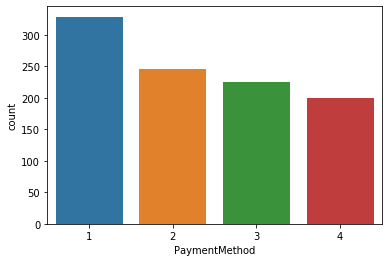

In [268]:
sns.countplot(df1['PaymentMethod'])

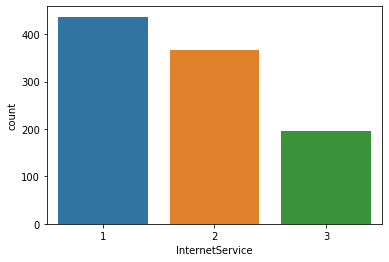

In [269]:
sns.countplot(df1['InternetService'])

# LogisticRegression

In [319]:
array = df.values

In [320]:
X = array[:,0:7]
y = array[:,7]

In [326]:

# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test


In [327]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg=logreg.fit(X_train,y_train)

In [328]:
y_pred=logreg.predict(X_test)

In [329]:
from sklearn.metrics import classification_report,confusion_matrix

In [330]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       252
           1       0.43      0.75      0.55        48

    accuracy                           0.80       300
   macro avg       0.69      0.78      0.71       300
weighted avg       0.86      0.80      0.82       300



In [331]:
print(confusion_matrix(y_pred,y_test))

[[204  48]
 [ 12  36]]


# ROC-AUC Analysis for Logistics Regression

In [332]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)



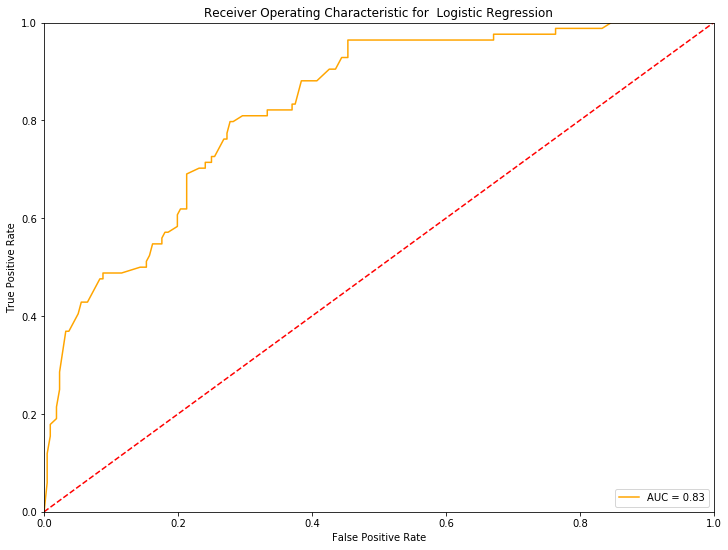

In [333]:

plt.figure(figsize=(12,9))
plt.title('Receiver Operating Characteristic for  Logistic Regression')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# K nearest neighbors

In [334]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [335]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       241
           1       0.49      0.69      0.57        59

    accuracy                           0.80       300
   macro avg       0.70      0.76      0.72       300
weighted avg       0.83      0.80      0.81       300



In [336]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

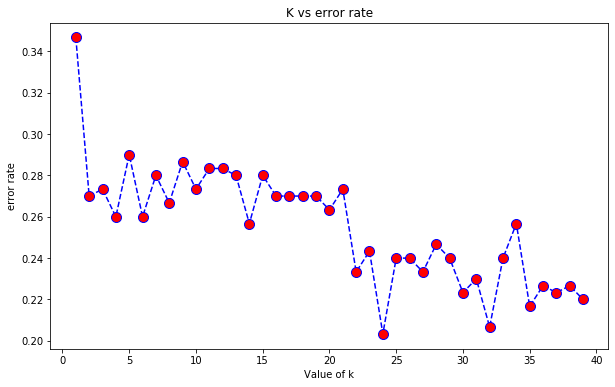

In [337]:
plt.figure(figsize=(10,6))
plt.title( 'K vs error rate')
plt.xlabel('Value of k')
plt.ylabel('error rate')
plt.plot(range(1,40),error_rate,color='blue', marker='o', linestyle='dashed', markerfacecolor='red',markersize=10)